In [ ]:
#Data Preprocessing

# Step 1: Upload and load dataset
import pandas as pd
import numpy as np
import re
import string
from sklearn.preprocessing import LabelEncoder

#Upload the dataset
from google.colab import files
Uploaded = files.upload()
df = pd.read_csv("Fake_News_Dataset.csv")

# Load the dataset
df = pd.read_csv('Fake_News_Dataset.csv')
print("Initial shape:", df.shape)

# Show column names
print("Columns:", df.columns.tolist())

# Step 2: Drop duplicates
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

# Step 3: Drop missing values
df.dropna(inplace=True)
print("Shape after removing nulls:", df.shape)

# Step 4: Reset index
df.reset_index(drop=True, inplace=True)

# Step 5: Encode label (if needed)
if df['Label'].dtype != 'int64':
    le = LabelEncoder()
    df['Label'] = le.fit_transform(df['Label'])  # Fake = 0, Real = 1 (or vice versa)

# Step 6: Clean text fields
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# Apply cleaning to all string columns except label
text_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'Label']
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Step 7: Save preprocessed dataset
df.to_csv('preprocessed_fake_news.csv', index=False)
print("Preprocessed data saved as 'preprocessed_fake_news.csv'")

Saving Fake_News_Dataset.csv to Fake_News_Dataset (1).csv
Initial shape: (200, 6)
Columns: ['ID', 'Word_Count', 'Number_of_Sentence', 'Unique_Words', 'Average_Word_Length', 'Label']
Shape after removing duplicates: (200, 6)
Shape after removing nulls: (200, 6)
Preprocessed data saved as 'preprocessed_fake_news.csv'


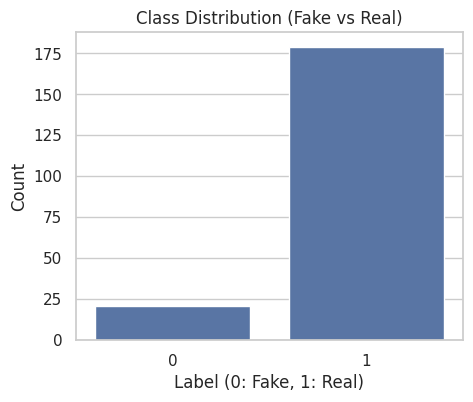

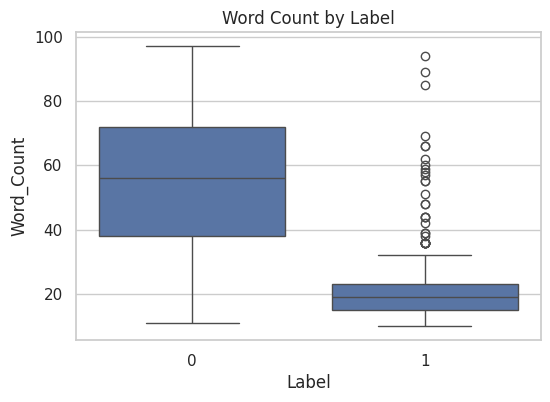

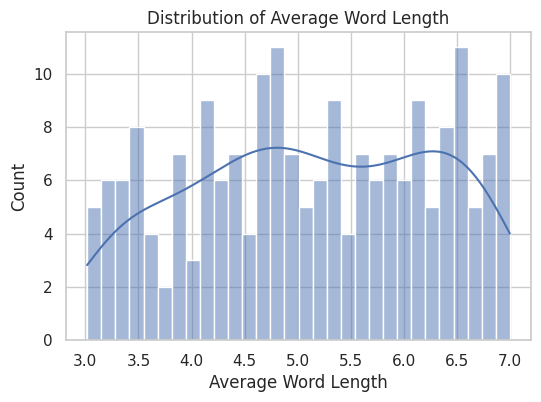

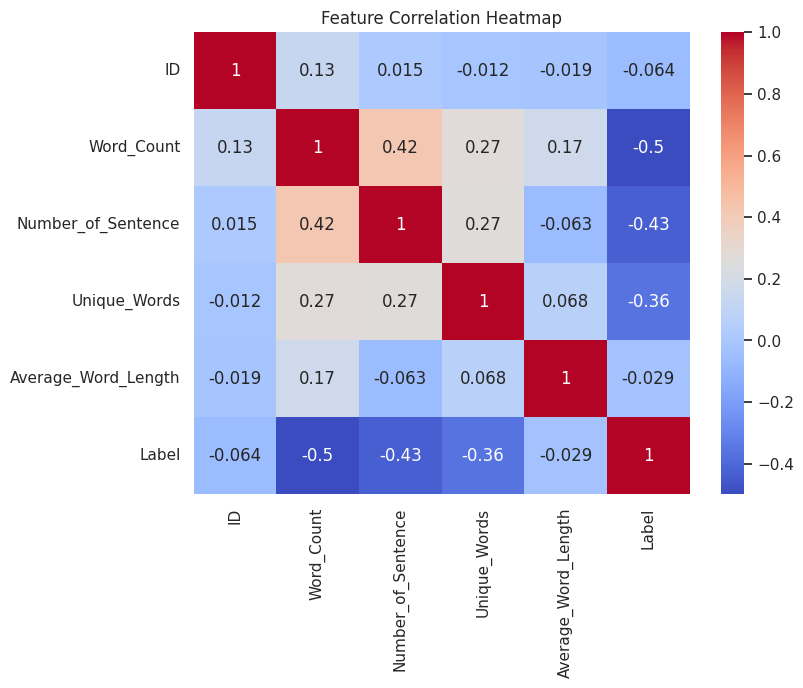

In [ ]:
#Exploratory Data Analysis (EDA)

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Label', data=df)
plt.title("Class Distribution (Fake vs Real)")
plt.xlabel("Label (0: Fake, 1: Real)")
plt.ylabel("Count")
plt.show()

# 2. Boxplot for Word Count
plt.figure(figsize=(6,4))
sns.boxplot(x='Label', y='Word_Count', data=df)
plt.title("Word Count by Label")
plt.show()

# 3. Distribution of Average Word Length
plt.figure(figsize=(6,4))
sns.histplot(df['Average_Word_Length'], bins=30, kde=True)
plt.title("Distribution of Average Word Length")
plt.xlabel("Average Word Length")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Key insights (write these manually in your report):
# - The dataset is relatively balanced/imbalanced.
# - Fake news may tend to have slightly different word count or unique word count.
# - Average word length is generally centered around X.

In [ ]:
#Feature Engineering

# 9th Section: Read the file and prepare features

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset (make sure the correct filename is used)
df = pd.read_csv('Fake_News_Dataset.csv', names=['ID', 'Word_count', 'Number_of_words', 'Unique_words', 'Average_Word_Length', 'Label'], header=None, skiprows=1)

# Drop the ID column
df.drop(columns=['ID'], inplace=True)

# Define features and target
X = df[['Word_count', 'Number_of_words', 'Unique_words', 'Average_Word_Length']]
y = df['Label']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Model building

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Use X_train and X_test from the 9th code
# (Assuming you already split the data there)

# Initialize models
lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
pac = PassiveAggressiveClassifier(max_iter=1000)

# Train models
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
pac.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_pac = pac.predict(X_test)

# Print accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Passive Aggressive Classifier Accuracy:", accuracy_score(y_test, y_pred_pac))

Logistic Regression Accuracy: 0.85
Naive Bayes Accuracy: 0.85
Passive Aggressive Classifier Accuracy: 0.975


Confusion Matrix - Logistic Regression:
 [[ 0  6]
 [ 0 34]]

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40


Confusion Matrix - Naive Bayes:
 [[ 0  6]
 [ 0 34]]

Classification Report - Naive Bayes:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        34

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40


Confusion Matrix - Passive Aggressive:
 [[ 5  1]
 [ 0 34]]

Classification Report - Passive Aggressive:
               precision    recall  f1-sco

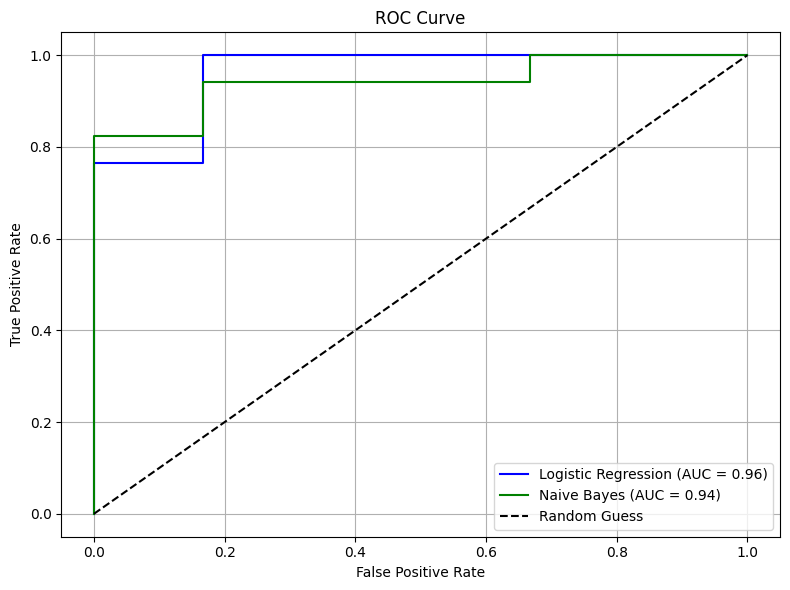

In [ ]:

#Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix - Logistic Regression:\n", cm_lr)
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_lr, zero_division=0))

# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix - Naive Bayes:\n", cm_nb)
print("\nClassification Report - Naive Bayes:\n", classification_report(y_test, y_pred_nb, zero_division=0))

# Passive Aggressive
cm_pac = confusion_matrix(y_test, y_pred_pac)
print("\nConfusion Matrix - Passive Aggressive:\n", cm_pac)
print("\nClassification Report - Passive Aggressive:\n", classification_report(y_test, y_pred_pac, zero_division=0))

# ROC Curve for Logistic Regression
y_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC Curve for Naive Bayes
y_proba_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# ROC Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr, color='blue')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb, color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.97      1.00      0.99        34

    accuracy                           0.97        40
   macro avg       0.99      0.92      0.95        40
weighted avg       0.98      0.97      0.97        40



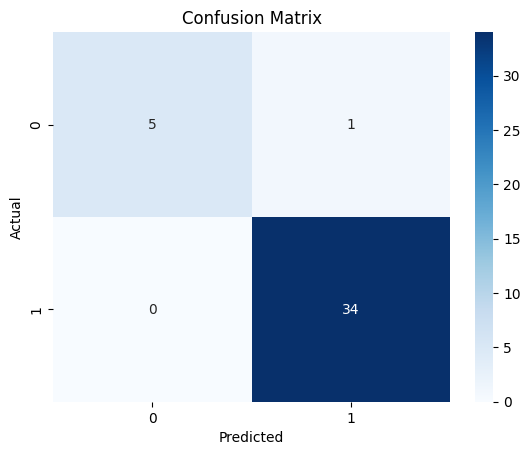

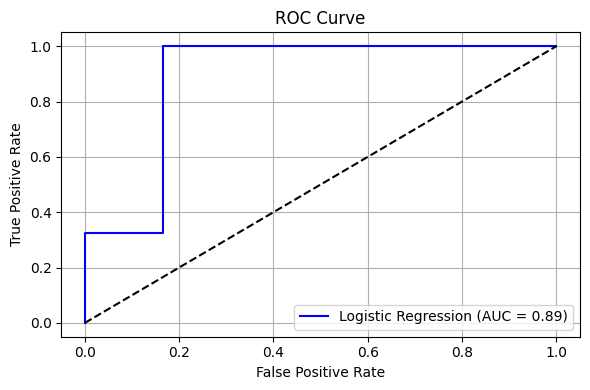

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Final part of Machine learning

# Install joblib if not already available
!pip install joblib

# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
df = pd.read_csv('Fake_News_Dataset.csv', names=['ID', 'Word_count', 'Number_of_words', 'Unique_words', 'Average_Word_Length', 'Label'], header=None, skiprows=1)
df.drop(columns=['ID'], inplace=True)

# Features and target
X = df[['Word_count', 'Number_of_words', 'Unique_words', 'Average_Word_Length']]
y = df['Label']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC
y_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the model, scaler, and column names
joblib.dump(lr, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

# Download them
from google.colab import files
files.download('logistic_model.pkl')
files.download('scaler.pkl')
files.download('feature_names.pkl')